# Q4: Working with Data
This is this repo github [link](https://github.com/a-samea/Ecenometrics-HWs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we have converted the mdb to xslx via Microsoft Access. We will now read the xslx file into a pandas dataframe.

In [2]:
Individual = pd.read_excel('CN95_2PERCENT_Individual.xlsx')
Household = pd.read_excel('CN95_2Percent_Household.xlsx')

## 4-1: Age Dataset: Individual

In [3]:
Individual['age'].describe()

count    1.048575e+06
mean     3.086737e+01
std      1.991113e+01
min      0.000000e+00
25%      1.500000e+01
50%      3.000000e+01
75%      4.400000e+01
max      1.000000e+02
Name: age, dtype: float64

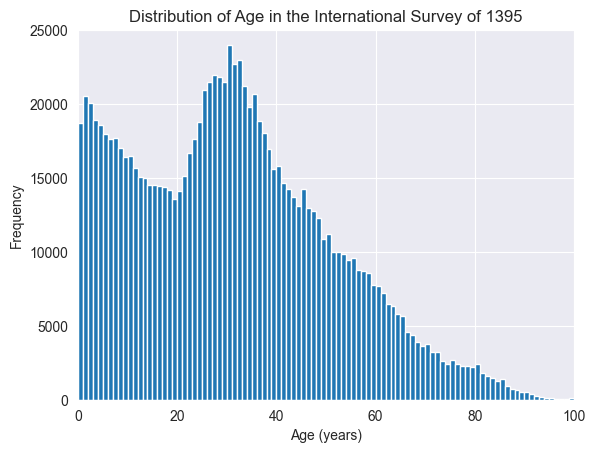

In [33]:
plt.title('Distribution of Age in the International Survey of 1395')
plt.hist(Individual['age'], bins = 100)
sns.set_style('darkgrid')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.ylim(0,25000)
plt.show()

## 4-2: Migration Dataset: Individual

To calculate the percentage of Migrations from 1390 to 1395 we will use the column 'ChangeMakanSince90' and count the number of rows that have a value of 1. We will then divide this number by the total number of rows in the dataset. Alternatively, we could calculate the average of the column 'ChangeMakanSince90' and multiply by 100.

In [7]:
Percentage = Individual['ChangeMakanSince90'].mean() * 100
print(f'Percentage of people who have changed their residence since 1390 is {Percentage:.2f}%. This is driven from 2% of the population.')

Percentage of people who have changed their residence since 1390 is 3.74%. This is driven from 2% of the population.


Next, we will group the dataset in a way that each 'ostan' has a value 'NumberOfImmigrant' and sort it to get the five most immigrated Provinces.

In [30]:
Top5ImmigratedTO = Individual.groupby('ostan')['ChangeMakanSince90'].sum().sort_values(ascending = False).head(5)
NameOfTheOstan1 = {10: 'Isfahan', 9: 'Khorasan Razavi', 7: 'Fars', 1: 'Gilan', 3: 'Azarbayejan Sharghi'}
print('Top 5 ostans that people have immigrated TO are:')
for i in Top5ImmigratedTO.index:
    print(NameOfTheOstan1[i], end = ', ')

Top 5 ostans that people have immigrated TO are:
Isfahan, Khorasan Razavi, Fars, Gilan, Azarbayejan Sharghi, 

In [37]:
Top5ImmigratedFROM = Individual.groupby('ResidenceOstan_country')['ChangeMakanSince90'].sum().sort_values(ascending = False).head(5)
NameOfTheOstan2 = {9: 'Khorasan Razavi', 10: 'Isfahan', 23: 'Tehran', 7: 'Fars', 6: 'Khuzestaan'}
print('Top 5 ostans that people have immigrated FROM are:')
for i in Top5ImmigratedFROM.index:
    print(NameOfTheOstan2[int(i)], end = ', ')

Top 5 ostans that people have immigrated FROM are:
Khorasan Razavi, Isfahan, Tehran, Fars, Khuzestaan, 

## 4-3: Divorce Dataset: Individual

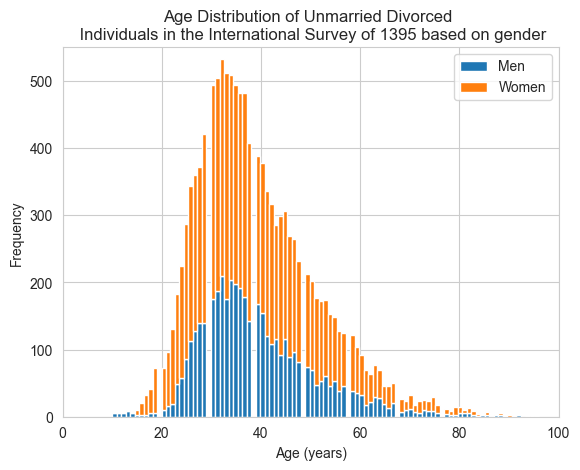

In [70]:
Men = Individual[(Individual.Gender==1) & (Individual.MarriageStatus==3)]
Women = Individual[(Individual.Gender==2) & (Individual.MarriageStatus==3)]
plt.title('Age Distribution of Unmarried Divorced \n Individuals in the International Survey of 1395 based on gender')
plt.hist([Men['age'],Women['age']],bins=95,histtype='barstacked')
sns.set_style('whitegrid')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.ylim(0,550)
plt.legend(['Men','Women'])
plt.show()

Between two Genders they experience roughly the same distribution but overall men where fewer than women.

## 4-4: Area of Residence Dataset: Houshold

When I first draw the Histogram I found that there are outlier data in the dataset. So I decided to remove them and draw the histogram again. The outlier data are those that have a value of more than 400. I removed them and draw the histogram again.

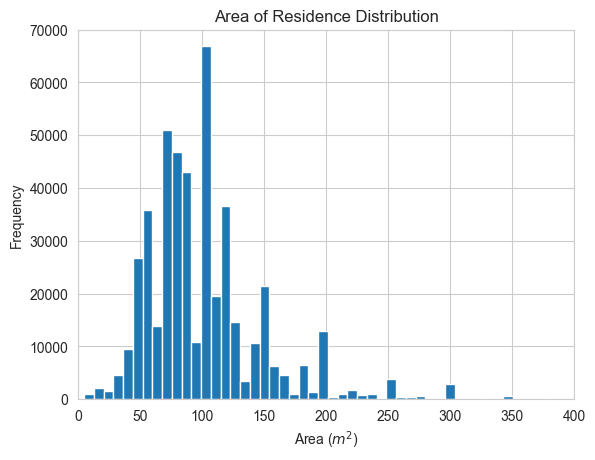

In [92]:
plt.title('Area of Residence Distribution')
Household = Household[(0 < Household['HouseArea']) & (Household['HouseArea'] < 400)]
plt.hist(Household['HouseArea'], bins = 50)
sns.set_style('whitegrid')
plt.xlabel('Area ($m^2$)')
plt.ylabel('Frequency')
plt.xlim(0,400)
plt.ylim(0,70000)
plt.show()

Urban areas Info:

In [94]:
Urban = Household[Household.ur==1]['HouseArea']
print(f'Average area of urban houses is {Urban.mean():.2f}')
print(f'Minimum area of urban houses is {Urban.min():.2f}')
print(f'Maximum area of urban houses is {Urban.max():.2f}')
print(f'Median area of urban houses is {Urban.median():.2f}')
print(f'Variation of area of urban houses is {Urban.var():.2f}')

Average area of urban houses is 103.67
Minimum area of urban houses is 5.00
Maximum area of urban houses is 398.00
Median area of urban houses is 95.00
Variation of area of urban houses is 2364.35


Rural areas Info:

In [95]:
Rural = Household[Household.ur==2]['HouseArea']
print(f'Average area of urban houses is {Rural.mean():.2f}')
print(f'Minimum area of urban houses is {Rural.min():.2f}')
print(f'Maximum area of urban houses is {Rural.max():.2f}')
print(f'Median area of urban houses is {Rural.median():.2f}')
print(f'Variation of area of urban houses is {Rural.var():.2f}')

Average area of urban houses is 94.53
Minimum area of urban houses is 5.00
Maximum area of urban houses is 393.00
Median area of urban houses is 90.00
Variation of area of urban houses is 1966.25
